# Estadística correlación

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
datasets_dir = r'..\..\python-ml-course-master\datasets'

In [21]:
filepath = datasets_dir + os.sep + r"ads/Advertising.csv"
data_ads = pd.read_csv(filepath)
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
len(data_ads)

200

In [7]:
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"])) 
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [8]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"])) ** 2
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [9]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"])) ** 2
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [12]:
corrp = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))
corrp  # Positivo creciente. Cuanto más se aumenta el gasto en TV más aumentan las ventas. Esta relacionado y bastante

0.782224424861606

In [15]:
def corre_coef(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2])) 
    df["corr1"] = (df[var1] - np.mean(df[var1])) ** 2
    df["corr2"] = (df[var2] - np.mean(df[var2])) ** 2
    corrp = sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corrp

In [38]:
corr_pearson = corre_coef(df=data_ads, var1="TV", var2="Sales")
corr_pearson

0.782224424861606

In [39]:
corr_pearson = corre_coef(df=data_ads, var1="Radio", var2="Sales")
corr_pearson

0.5762225745710553

In [40]:
cols = data_ads.columns.values

In [41]:
for x in cols:
    for y in cols:
        print(x + ", " + y + ": " + str(corre_coef(df=data_ads, var1=x, var2=y)))

TV, TV: 1.0
TV, Radio: 0.05480866446583009
TV, Newspaper: 0.056647874965056993
TV, Sales: 0.782224424861606
TV, corrn: -0.0011216033233262073
TV, corr1: -0.07879735036509569
TV, corr2: -0.04435683271077501
Radio, TV: 0.05480866446583009
Radio, Radio: 1.0
Radio, Newspaper: 0.3541037507611752
Radio, Sales: 0.5762225745710553
Radio, corrn: 0.003367194224496663
Radio, corr1: 0.1085768694522202
Radio, corr2: 0.28933391270094067
Newspaper, TV: 0.056647874965056993
Newspaper, Radio: 0.3541037507611752
Newspaper, Newspaper: 1.0
Newspaper, Sales: 0.22829902637616525
Newspaper, corrn: 0.004654495262249754
Newspaper, corr1: 0.5503385875778577
Newspaper, corr2: 0.45100034081887913
Sales, TV: 0.782224424861606
Sales, Radio: 0.5762225745710553
Sales, Newspaper: 0.22829902637616525
Sales, Sales: 1.0
Sales, corrn: 0.03435823617756815
Sales, corr1: 0.3226857579432848
Sales, corr2: 0.3391108854965276
corrn, TV: 0.002251660616088983
corrn, Radio: 0.013091062391317217
corrn, Newspaper: 0.00300164508896656

In [42]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto vs ventas')

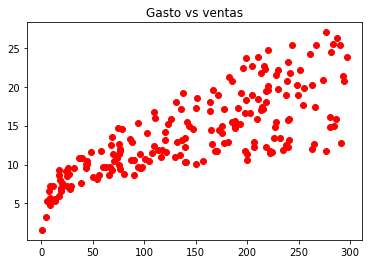

In [43]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto vs ventas")

Text(0.5, 1.0, 'Gasto vs ventas')

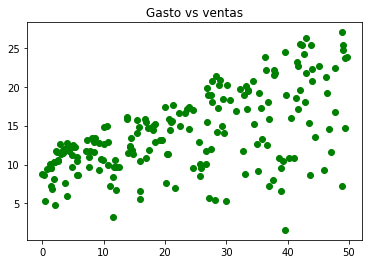

In [44]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto vs ventas") 

Text(0.5, 1.0, 'Gasto vs ventas')

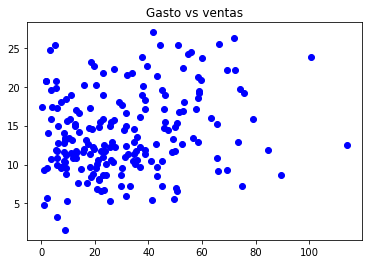

In [45]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto vs ventas") 

In [47]:
data_ads = pd.read_csv(filepath)
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


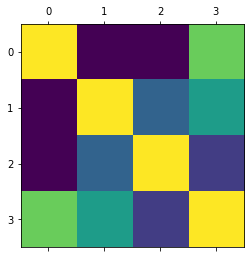

In [48]:
plt.matshow(data_ads.corr())